The lecture of the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#print the dataset
df=pd.read_csv('/content/kaggle.csv')
df

,Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2459,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2460,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2461,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


In this part I am removing the things that I do not need

In [ ]:
Removing_Columns = ['Lat', 'Lng', 'Accepted name', 'Max', 'Cc', 'Early Interval', 'Formation', 'Geological Interval', 'Ref Author', 'Max Ma', 'Min Ma']
df = df.drop(Removing_Columns, axis=1, errors='ignore')


In [ ]:
df

,What Dinosaurs Eat,Accepted Name,Country,Diet,Geological Time Period,Ref Pubyr,State
0,PLANT,Chaoyangsaurus youngi,China,herbivore,Jurassic,1992,Liaoning
1,PLANT and ANIMAL,Protarchaeopteryx robusta,China,omnivore,Cretaceous,1998,Liaoning
2,PLANT and ANIMAL,Caudipteryx zoui,China,omnivore,Cretaceous,1997,Liaoning
3,FLESH,Gorgosaurus libratus,Canada,carnivore,Cretaceous,1922,Alberta
4,FLESH,Gorgosaurus libratus,Canada,carnivore,Cretaceous,1970,Alberta
...,...,...,...,...,...,...,...
2458,FISH,Hesperornis chowi,Canada,piscivore,Cretaceous,2016,Manitoba
2459,FISH,Hesperornis macdonaldi,Canada,piscivore,Cretaceous,2016,Manitoba
2460,FISH,Hesperornis macdonaldi,Canada,piscivore,Cretaceous,2016,Manitoba
2461,FISH,Hesperornis chowi,Canada,piscivore,Cretaceous,2016,Manitoba


Check if I have Nan, int, and float Values

In [ ]:
valores_Nan = df.isna().sum()
print(valores_Nan[valores_Nan > 0])

Series([], dtype: int64)


In [ ]:
valores_nulos = df.select_dtypes(include=['int64', 'float64']).isnull().sum()
print(valores_nulos)

Ref Pubyr    0
dtype: int64


In [ ]:
missing_values = df.isna().sum()
print(missing_values)


What Dinosaurs Eat        0
Accepted Name             0
Country                   0
Diet                      0
Geological Time Period    0
Ref Pubyr                 0
State                     0
dtype: int64


This is for mapping the categorical values in my DataFrame to numerical values. This is a common preprocessing step to convert text labels into a format that the algorithm can understand

In [ ]:
# Mapping for "What Dinosaurs Eat"
what_dinosaurs_eat_mapping = {
    'PLANT': 0,
    'PLANT AND ANIMAL': 1,
    'FLESH': 2,
    'FISH': 3
    }
# Mapping for "Diet"
diet_mapping = {
    'herbivore': 0,
    'omnivore': 1,
    'carnivore': 2,
    'piscivore': 3
}

# Apply the mappings to their respective columns
df['What Dinosaurs Eat'] = df['What Dinosaurs Eat'].map(what_dinosaurs_eat_mapping)
df['Diet'] = df['Diet'].map(diet_mapping)



In [ ]:
# Mapping for "Country"
country_mapping = {
    'China': 0,
    'Canada': 1,
    'Mexico': 2,
    'United States': 3
}

# Mapping for "Geological Time Period"
geological_time_mapping = {
    'Jurassic': 1,
    'Cretaceous': 2,
    'Triassic': 3
}

# Apply the mappings to their respective columns
df['Country'] = df['Country'].map(country_mapping)
df['Geological Time Period'] = df['Geological Time Period'].map(geological_time_mapping)

**Naive Bayes**


In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Apply Label Encoding to my Naive Bayes: to convert textual labels in specific DataFrame columns, including 'What Dinosaurs Eat,' 'Diet,' 'Geological Time Period,' and 'Country,' into numerical values. This is essential for preparing categorical data for machine learning.

Data Splitting: The dataset is then split into training and testing sets using the train_test_split function. This separation ensures that the model's performance can be accurately evaluated on unseen data.

Class Imbalance Handling: Recognizing potential class imbalance issues, the Random Over-Sampling technique is applied to balance the class distribution. This is achieved through the RandomOverSampler from the imbalanced-learn (imblearn) library. Class balancing is important, especially when certain classes have significantly fewer samples than others.

To assess the model's performance, a classification report is generated. This report includes key metrics such as precision, recall, and F1-score for each class. The zero_division parameter is configured to prevent division by zero in the classification report.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Codificar las etiquetas de texto en valores numéricos
label_encoder = LabelEncoder()
df['What Dinosaurs Eat'] = label_encoder.fit_transform(df['What Dinosaurs Eat'])
df['Diet'] = label_encoder.fit_transform(df['Diet'])
df['Geological Time Period'] = label_encoder.fit_transform(df['Geological Time Period'])
df['Country'] = label_encoder.fit_transform(df['Country'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['Diet', 'Geological Time Period', 'Country']]
y = df['What Dinosaurs Eat']

# Balanceo de clases con sobremuestreo
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Dividir los datos sobremuestreados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Naive Bayes con ajuste de hiperparámetros
naive_bayes_model = GaussianNB(var_smoothing=1e-9)  # Ajusta el hiperparámetro var_smoothing
naive_bayes_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = naive_bayes_model.predict(X_test)

# Evaluación del modelo (informe de clasificación) con zero_division configurado
classification_report_result = classification_report(y_test, y_pred, zero_division=1)
print(classification_report_result)

# Realizar predicciones
y_pred = naive_bayes_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00       235

    accuracy                           1.00       947
   macro avg       1.00      1.00      1.00       947
weighted avg       1.00      1.00      1.00       947

Precisión del modelo: 1.0


In [ ]:
pip install scikit-plot


An ROC curve shows how TPR and FPR change as the decision threshold of the model is adjusted. The diagonal line on the curve represents a random or nondiscriminatory model, while an ideal model would be in the upper left corner of the graph, indicating that it has a high TPR and low FPR.

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00       235

    accuracy                           1.00       947
   macro avg       1.00      1.00      1.00       947
weighted avg       1.00      1.00      1.00       947


Matriz de confusión:
[[248   0   0   0]
 [  0 234   0   0]
 [  0   0 230   0]
 [  0   0   0 235]]

Precisión: 1.0

Puntuaciones de validación cruzada: [1. 1. 1. 1. 1.]


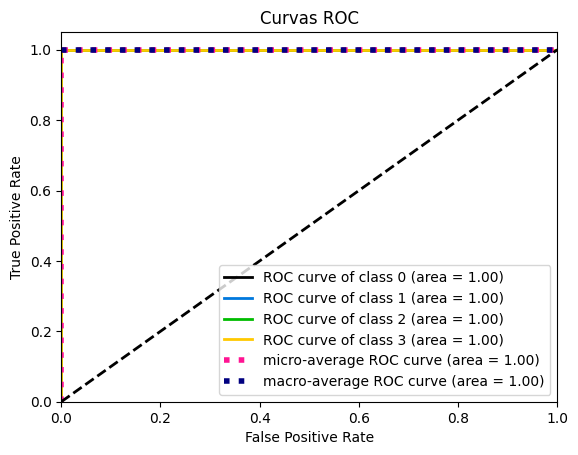

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Naive Bayes con ajuste de hiperparámetros
naive_bayes_model = GaussianNB(var_smoothing=1e-9)
naive_bayes_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_model.predict(X_test)

# Informe de clasificación
classification_report_result = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(classification_report_result)

# Matriz de confusión
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(confusion_matrix_result)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión:", accuracy)

# Validación cruzada
cross_val_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=5)
print("\nPuntuaciones de validación cruzada:", cross_val_scores)

# Curvas ROC y precisión-recall
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

plot_roc(y_test, naive_bayes_model.predict_proba(X_test))
plt.title('Curvas ROC')
plt.show()


An example applying the Naive Bayes responding a question:

In [ ]:
# Create a new example with the specified features
new_example = pd.DataFrame({'Diet': [0], 'Geological Time Period': [1], 'Country': [0]})

# An example of a prediction with the Naive Bayes model
probabilities = naive_bayes_model.predict_proba(new_example)

# Define the categories
categories = ['PLANT', 'PLANT AND ANIMAL', 'FLESH', 'FISH']

# Print the question and the probabilities
print("What is the probability that a plant-eating dinosaur was discovered in China?")
print(f"Probability of Country = China: {probabilities[0, 0]}")

What is the probability that a plant-eating dinosaur was discovered in China?
Probability of Country = China: 0.9999985992918288
